**Credit:**  Adapted from CS161-MIT (originally developed by Mary Wotters, and modified by Nima Anari, Moses Charikar, etc). 


# Sorting: Mergesort

Here is a quick implementation of Mergesort. 

In [1]:
# merge two sorted arrays to return a sorted array
def merge(L, R):
    i = 0 # current index in the L array
    j = 0 # current index in the R array
    ret = []
    while i < len(L) and j < len(R):
        if L[i] < R[j]:
            ret.append(L[i])
            i += 1
        else:   # ties go to R.  Doesn't really matter.
            ret.append(R[j])
            j += 1
    while i < len(L):
        ret.append(L[i])
        i += 1
    while j < len(R):
        ret.append(R[j])
        j+= 1
    return ret
        
def mergeSort(A):
    n = len(A)
    if n <= 1:
        return A
    L = mergeSort(A[:round(n/2)])
    R = mergeSort(A[round(n/2):n])
    return merge(L,R)

Let's sanity-check:

In [2]:
A = [27,17,2,4,52,3,4,3]
B = mergeSort(A)
print(B)

[2, 3, 3, 4, 4, 17, 27, 52]


Let's run it a bunch and plot its running time. 

In [3]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from random import shuffle

In [4]:
import time
from random import choice

# tryItABunch: runs a function a bunch, and times how long it takes.
#
# Input: myFn: a function which takes as input a list of integers
# Output: lists nValues and tValues so that running myFn on a list of length nValues[i] took 
# (on average over numTrials tests) time tValues[i] milliseconds.
#
# Other optional args:
#    - startN: smallest n to test
#    - endN: largest n to test
#    - stepSize: test n's in increments of stepSize between startN and endN
#    - numTrials: for each n tests, do numTrials tests and average them
#    - listMax: the input lists of length n will have values drawn uniformly at random from range(listMax)
def tryItABunch(myFn, startN=10, endN=100, stepSize=10, numTrials=20, listMax = 10):
    nValues = []
    tValues = []
    for n in range(startN, endN, stepSize):
        # run myFn several times and average to get a decent idea.
        runtime = 0
        for t in range(numTrials):
            lst = [ choice(range(listMax)) for i in range(n) ] # generate a random list of length n
            start = time.time()
            myFn( lst )
            end = time.time()
            runtime += (end - start) * 1000 # measure in milliseconds
        runtime = runtime/numTrials
        nValues.append(n)
        tValues.append(runtime)
    return nValues, tValues

In [5]:
nValuesMerge, tValuesMerge = tryItABunch( mergeSort, startN = 50, endN = 3000, 
                                         stepSize=50, numTrials=10, listMax = 1000)

Text(0.5, 1.0, 'Sorting')

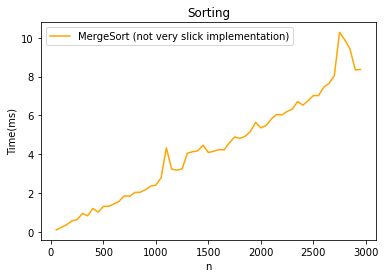

In [6]:
plt.plot(nValuesMerge, tValuesMerge, color="orange", label="MergeSort (not very slick implementation)")
plt.xlabel("n")
plt.ylabel("Time(ms)")
plt.legend()
plt.title("Sorting")

## Mergesort v. Insertion Sort

The following  implements the insertion sort in-place as described in the lecture.

In [7]:
def insertionSort(A):
    for i in range(1,len(A)):
        current = A[i]
        j = i-1
        while j >= 0 and A[j] > current:
            A[j+1] = A[j]
            j -= 1
        A[j+1] = current

Let's sanity-check:

In [8]:
A = [6,4,3,8,5]
insertionSort(A)
print(A)

[3, 4, 5, 6, 8]


Now, let's compare Mergesort and Insertion sort.  We are going to run each one a bunch of times and plot the running times. 

In [9]:
nValuesMerge, tValuesMerge = tryItABunch( mergeSort, startN = 50, endN = 1000, 
                                         stepSize=50, numTrials=10, listMax = 1000)
nValues, tValues = tryItABunch( insertionSort, startN = 50, endN = 1000, 
                                         stepSize=50, numTrials=10, listMax = 1000)

And now we plot the running times for  both sorts: 

Text(0.5, 1.0, 'All sorts of sorts')

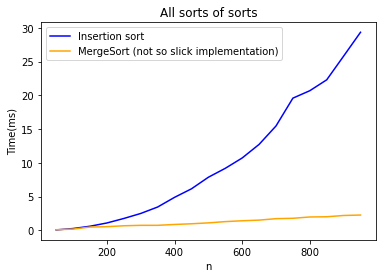

In [10]:
plt.plot(nValues, tValues, color="blue", label="Insertion sort")
plt.plot(nValuesMerge, tValuesMerge, color="orange", label="MergeSort (not so slick implementation)")
plt.xlabel("n")
plt.ylabel("Time(ms)")
plt.legend()
plt.title("All sorts of sorts")

In the lines above, endN is set 1000.  What do you expect will happen on even larger inputs?  Modify above and try. 